# **Atividade de experimentação 64**

Classificar imagens nas categorias cães e gatos. Utilize o conjunto de imagens disponibilizados no Google Salda de Aula.

## Importação das bibliotecas

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
## from google.colab.patches import cv2_imshow
tf.__version__

'2.16.1'

## Carregamento das imagens

In [ ]:
# Conexão do Google Colava à pasta do Google Drive, local onde deverá ter salvo a pasta caes-e-gatos.zip
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Descompactar a pasta caes-e-gatos na pasta de Arquivos do Google Colab
path = '/content/drive/MyDrive/caes-e-gatos.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [5]:
path = ('C:\\Users\\Spock\\Downloads\\IA\\parte2\\caes-e-gatos')

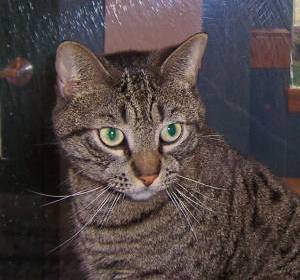

In [6]:
# Localizar o caminho da primeira imagem de gato na pasta treinamento
tf.keras.preprocessing.image.load_img('C:\\Users\\Spock\\Downloads\\IA\\parte2\\caes-e-gatos\\treinamento\\gato\\cat.1.jpg')

In [ ]:
# Localizar o caminho da primeira imagem de cão na pasta treinamento
tf.keras.preprocessing.image.load_img('/content/caes-e-gatos/treinamento/cao/dog.1.jpg')

## Base de treinamento e teste

In [7]:
# Localizar as 4000 imagens, nas duas classes para a base de treinamento
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('C:\\Users\\Spock\\Downloads\\IA\\parte2\\caes-e-gatos\\treinamento',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [8]:
# Estabelecendo índices para as classes no treinamento 0: cão e 1: gato
dataset_treinamento.class_indices

{'cao': 0, 'gato': 1}

In [10]:
# Localizar o campinho para a paste de teste, contendo 1000 imagens com as duas classes
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('C:\\Users\\Spock\\Downloads\\IA\\parte2\\caes-e-gatos\\teste',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [11]:
# Criando cada camada da rede neural, conforme o modelo sequencial da rede neural convolucional
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

c:\Users\Spock\Downloads\IA\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# Visualizando o modelo com as classes criadas
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Estabelecendo as taxas de perda e acurácia para o modelo
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Treinando o modelo com 10 épocas de treinamento
# OBSERVAÇÃO: esta execução pode demorar conforme o desempenho de sua máquina
historico = network.fit(dataset_treinamento, epochs=10)

Epoch 1/10


c:\Users\Spock\Downloads\IA\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/125 ━━━━━━━━━━━━━━━━━━━━ 1:31 743ms/step - accuracy: 0.3594 - loss: 2.6261

## Avaliação da rede neural

In [ ]:
# Estabelecendo índices para as classes no teste 0: cão e 1: gato
dataset_teste.class_indices

In [ ]:
# Trazendo ao modelo as predições do treinamento
previsoes = network.predict(dataset_teste)

In [ ]:
# Verificando a máxima previsão para as classes
previsoes = np.argmax(previsoes, axis = 1)

In [ ]:
# Verificando os dados do modelo treinado
dataset_teste.classes

In [ ]:
# Demonstrando a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

**OBSERVAÇÃO: o valor demonstrado acima é a precisão do treinamento do modelo. Valores quanto mais próximos de 1, mais precisa será a classificação.
Para aumentar a precisão, pode-se retreinar o modelo ou ainda inserir mais imagens para o treinamento.**

In [ ]:
# Atribuindo as classes ao modelo treinado
dataset_teste.class_indices

In [ ]:
# Estabelecendo a matriz de confusão para confronto do dados entre as classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)

In [ ]:
# Demonstrando a matriz de confusão
sns.heatmap(cm, annot=True);

In [ ]:
# Classificando os dados obtidos
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

## Salvar e carregar a rede neural

In [ ]:
# Gerando um arquivo .json com os dados do modelo
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
# Criando o arquivo de pesos (pesos.hdf5) do treinamento
from keras.models import save_model
network_saved = save_model(network, '/content/pesos.hdf5')

In [ ]:
# Visualizando os dados salvos no arquivo .json
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

In [ ]:
# Atribuindo o treinamento ao modelo
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('pesos.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Visualizando o modelo de rede neural
network_loaded.summary()

## Classificação de uma única imagem

In [ ]:
# Na pasta teste, localize qualquer imagem para a classificação, conforme o modelo treinado
imagem = cv2.imread('/content/caes-e-gatos/teste/gato/cat.3500.jpg')
#imagem = cv2.imread('/content/caes-e-gatos/teste/cao/dog.3501.jpg')
cv2_imshow(imagem)

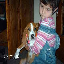

In [ ]:
# Redimensionando a imagem em 64x64 pixels
imagem = cv2.resize(imagem, (64, 64))
cv2_imshow(imagem)

In [ ]:
# Convertendo em escala de cinza
imagem = imagem / 255

In [ ]:
# Parâmetros da imagem redimensionada
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

In [ ]:
resultado = network_loaded(imagem)
resultado

In [ ]:
# Demonstrando a classe que obteve o maior resultado
resultado = np.argmax(resultado)
resultado

In [ ]:
# Verificando as classes do modelo
dataset_teste.class_indices

In [ ]:
# Categorizando o resultado
if resultado == 0:
  print('Cão')
else:
  print('Gato')

**Para testar outras imagens, indique o nome do arquivo e repita todos os passos desta classificação.**